#Part1: What do we want to know from the Titanic data set?

###Question1: What is the general survival rate?

###Question2: Does the different sex have a effect on the survival rate? Is that true that men have a higher survival rate and women have a lower survival rate?

###Question3: Does the different society economic status have a effect on the survival rate? Is that true that passengers in upper class have a higher survival rate?

###Question4: Does the age have a effect on the survial rate? Is that true that young kids and old people have a lower survival rate?

###Question5: Does the number of relatives on the boat have a effect on the survival rate? Relatives include siblings and parents.

#Part2: Import and clean dataset, prepare for the data analysis

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
passengers_df = pd.read_csv('titanic-data.csv')
def setChartHead(ax, title, x_labels, y_labels, xticks, legends):
    ax.set_ylabel(y_labels)
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_xticklabels(x_labels)
    ax.legend(legends)

In [110]:
passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above info of dataset, we know that most of the "Cabin" column data are missing, so in the following analysis, we will ignore the "Cabin" column data. For "Age" column data and "Embarked" column data, we will take the existed data for the following analysis.

##Extract non-null data to different groups, prepared for the following analysis

In [111]:
passengers_df['Relatives'] = passengers_df['SibSp'].add(passengers_df['Parch'])
men = passengers_df.loc[passengers_df['Sex'] == 'male']
women = passengers_df.loc[passengers_df['Sex'] == 'female']
upperClass = passengers_df.loc[passengers_df['Pclass'] == 1]
middleClass = passengers_df.loc[passengers_df['Pclass'] == 2]
lowerClass = passengers_df.loc[passengers_df['Pclass'] == 3]
ages = passengers_df.loc[passengers_df['Age'] >= 0]
embark = passengers_df.loc[(passengers_df['Embarked'] == 'C')|(passengers_df['Embarked'] == 'Q')|(passengers_df['Embarked'] == 'S')]


#Part3: Answer the questions in Part1

##Question1: What is the general survival rate?

In [112]:
total_survival_rate = len(passengers_df.loc[passengers_df['Survived'] == 1]) / len(passengers_df)
print("The total survival rate is: " + str(total_survival_rate))

The total survival rate is: 0.3838383838383838


##Question2: Does the different sex have a effect on the survival rate? Is that true that men have a higher survival rate and women have a lower survival rate?

The survival rate of men is: 0.18890814558058924
The survival rate of women is: 0.7420382165605095


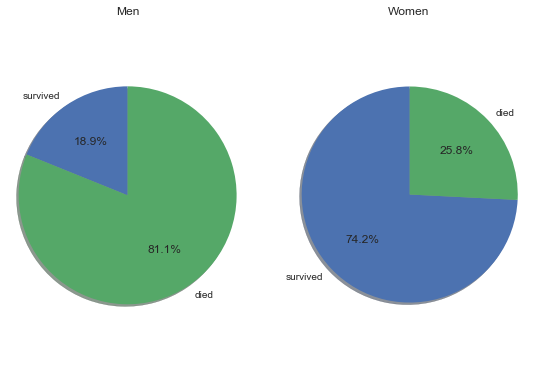

In [114]:
men_survival_rate = len(men.loc[passengers_df['Survived'] == 1]) / len(men)
women_survival_rate = len(women.loc[passengers_df['Survived'] == 1]) / len(women)
fig1, ax1 = plot.subplots(1,2)
fig1.tight_layout()
ax1[0].pie([men_survival_rate, 1- men_survival_rate], labels=['survived', 'died'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1[0].axis('equal') 
ax1[0].set_title('Men')
ax1[1].pie([women_survival_rate, 1 - women_survival_rate], labels=['survived', 'died'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1[1].axis('equal') 
ax1[1].set_title('Women')
print("The survival rate of men is: " + str(men_survival_rate))
print("The survival rate of women is: " + str(women_survival_rate))
plot.show()

###From the above statistics and pie chart, the women's survival rate is far more than men's survival rate.

##Question3: Does the different society economic status have a effect on the survival rate? Is that true that passenger in upper class have a higher survival rate?

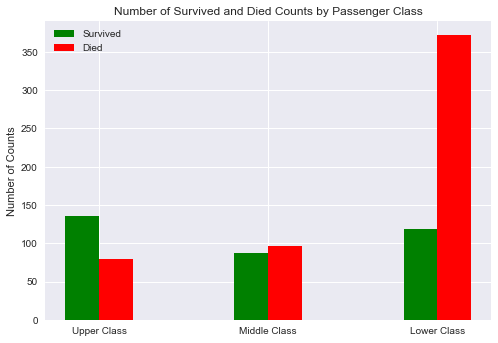

The survival rate of upper class is: 0.6296296296296297
The survival rate of middle class is: 0.47282608695652173
The survival rate of lower class is: 0.24236252545824846


In [165]:
upper_class_survival_amount = len(upperClass.loc[upperClass['Survived'] == 1])
upper_class_died_amount = len(upperClass.loc[upperClass['Survived'] == 0])
middle_class_survival_amount = len(middleClass.loc[middleClass['Survived'] == 1])
middle_class_died_amount = len(middleClass.loc[middleClass['Survived'] == 0])
lower_class_survival_amount = len(lowerClass.loc[lowerClass['Survived'] == 1])
lower_class_died_amount = len(lowerClass.loc[lowerClass['Survived'] == 0])
fig, ax = plot.subplots()
ind = np.arange(3)
width = 0.2
rec1 = ax.bar(ind, (upper_class_survival_amount, middle_class_survival_amount, lower_class_survival_amount), width, color='g')
rec2 = ax.bar(ind + width, (upper_class_died_amount, middle_class_died_amount, lower_class_died_amount), width, color='r')
setChartHead(ax, 'Number of Survived and Died Counts by Passenger Class', ["Upper Class", "Middle Class", "Lower Class"], 'Number of Counts', ind + width / 2, ["Survived", "Died"])
plot.show()
upper_class_survival_rate = len(upperClass.loc[upperClass['Survived'] == 1]) / len(upperClass)
print("The survival rate of upper class is: " + str(upper_class_survival_rate))
middle_class_survival_rate = len(middleClass.loc[middleClass['Survived'] == 1]) / len(middleClass)
print("The survival rate of middle class is: " + str(middle_class_survival_rate))
lower_class_survival_rate = len(lowerClass.loc[lowerClass['Survived'] == 1]) / len(lowerClass)
print("The survival rate of lower class is: " + str(lower_class_survival_rate))

####From the above chart and statistics, we know that the upper class has the most survival rate, and the middle class has the second highest survival rate. Lower class has the lowest survival rate.

###What is the distribution of women and men in three class?

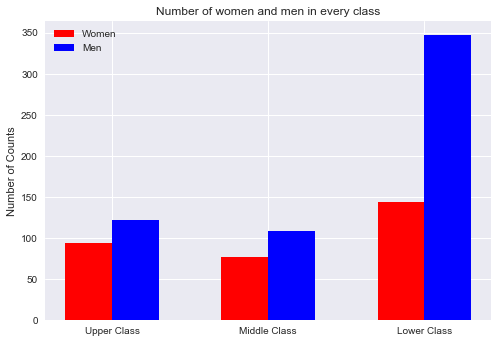

In [166]:
men_upper_class_survived = len(upperClass.loc[(upperClass['Sex'] == 'male') & (upperClass['Survived'] == 1)])
men_middle_class_survived = len(middleClass.loc[(middleClass['Sex'] == 'male') & (middleClass['Survived'] == 1)])
men_lower_class_survived = len(lowerClass.loc[(lowerClass['Sex'] == 'male') & (lowerClass['Survived'] == 1)])
women_upper_class_survived = len(upperClass.loc[(upperClass['Sex'] == 'female') & (upperClass['Survived'] == 1)])
women_middle_class_survived = len(middleClass.loc[(middleClass['Sex'] == 'female') & (middleClass['Survived'] == 1)])
women_lower_class_survived = len(lowerClass.loc[(lowerClass['Sex'] == 'female') & (lowerClass['Survived'] == 1)])
men_upper_class_died = len(upperClass.loc[(upperClass['Sex'] == 'male') & (upperClass['Survived'] == 0)])
men_middle_class_died = len(middleClass.loc[(middleClass['Sex'] == 'male') & (middleClass['Survived'] == 0)])
men_lower_class_died = len(lowerClass.loc[(lowerClass['Sex'] == 'male') & (lowerClass['Survived'] == 0)])
women_upper_class_died = len(upperClass.loc[(upperClass['Sex'] == 'female') & (upperClass['Survived'] == 0)])
women_middle_class_died = len(middleClass.loc[(middleClass['Sex'] == 'female') & (middleClass['Survived'] == 0)])
women_lower_class_died = len(lowerClass.loc[(lowerClass['Sex'] == 'female') & (lowerClass['Survived'] == 0)])
fig, ax = plot.subplots()
ind = np.arange(3)
width = 0.3
rects1 = ax.bar(ind, (len(upperClass.loc[upperClass['Sex'] == 'female']),len(middleClass.loc[middleClass['Sex'] == 'female']),len(lowerClass.loc[lowerClass['Sex'] == 'female'])), width, color='r')
rects2 = ax.bar(ind + width, (len(upperClass.loc[upperClass['Sex'] == 'male']),len(middleClass.loc[middleClass['Sex'] == 'male']),len(lowerClass.loc[lowerClass['Sex'] == 'male'])), width, color='b')
setChartHead(ax,'Number of women and men in every class', ("Upper Class", "Middle Class", "Lower Class"), "Number of Counts", ind + width / 2, ("Women", "Men"))
plot.show()

###What is the sex difference's effect on the survival on every class?

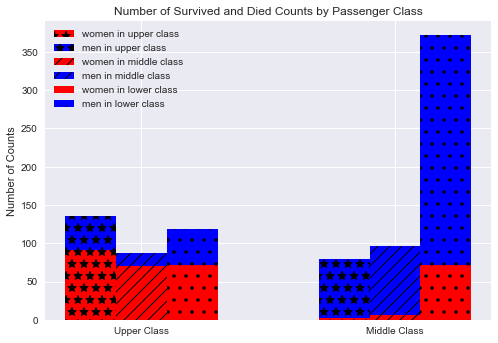

Upper class women survival rate: 0.4212962962962963
Upper class men survival rate: 0.20833333333333334
Middle class women survival rate: 0.3804347826086957
Middle class men survival rate: 0.09239130434782608
Lower class women survival rate: 0.14663951120162932
Lower class men survival rate: 0.09572301425661914


In [167]:
fig, ax = plot.subplots()
ind = np.arange(2)
width = 0.2
rects1 = ax.bar(ind, (women_upper_class_survived, women_upper_class_died), width, color='r',hatch="*")
rects2 = ax.bar(ind, (men_upper_class_survived, men_upper_class_died), width, color='b', bottom=(women_upper_class_survived, women_upper_class_died),hatch="*")
rects3 = ax.bar(ind + width, (women_middle_class_survived, women_middle_class_died), width, color='r',hatch="//") 
rects4 = ax.bar(ind + width, (men_middle_class_survived, men_middle_class_died),width, color='b', bottom=(women_middle_class_survived, women_middle_class_died),hatch="//") 
rects5 = ax.bar(ind + 2 * width, (women_lower_class_survived, women_lower_class_died), width, color='r',hatch=".") 
rects6 = ax.bar(ind + 2 * width, (men_lower_class_survived, men_lower_class_died), width, color='b', bottom=(women_lower_class_survived, women_lower_class_died),hatch=".") 
setChartHead(ax, 'Number of Survived and Died Counts by Passenger Class', ("Upper Class", "Middle Class", "Lower Class"), "Number of Counts", ind + width, ("women in upper class", "men in upper class", "women in middle class", "men in middle class", "women in lower class", "men in lower class"))
plot.show()
print("Upper class women survival rate: " + str((women_upper_class_survived) / len(upperClass)))
print("Upper class men survival rate: " + str((men_upper_class_survived) / len(upperClass)))
print("Middle class women survival rate: " + str((women_middle_class_survived) / len(middleClass)))
print("Middle class men survival rate: " + str((men_middle_class_survived) / len(middleClass)))
print("Lower class women survival rate: " + str((women_lower_class_survived) / len(lowerClass)))
print("Lower class men survival rate: " + str((men_lower_class_survived) / len(lowerClass)))

####Women and men's survivla rates in upper class are also higher than other classes seperately. Lower class has the lowest survival rate. Women's survivl rates are all higher than men's in all three classes.

##Question4: Does the age have a effect on the survial rate? Is that true that young kids and old people have a lower survival rate?

In [29]:
bin_width = 10
age_bins = np.arange(0, 100, bin_width)
sns.set()

###What is the age distribution of all passengers

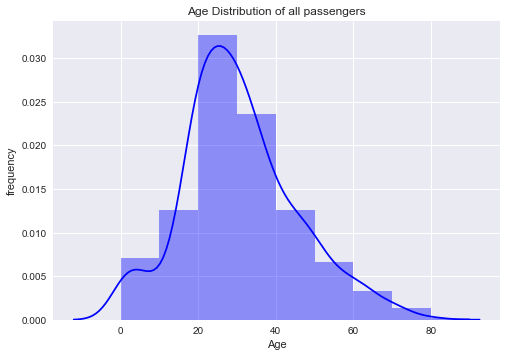

In [71]:
ages = passengers_df.loc[(~passengers_df['Age'].isnull()), 'Age']
ax = sns.distplot(men_ages, age_bins, color='b', hist=True)
plot.title("Age Distribution of all passengers")
plot.ylabel("frequency")
plot.show()

###What is the age distribution between men and women?

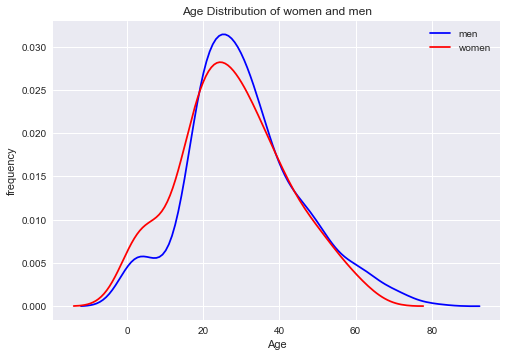

In [42]:
men_ages = passengers_df.loc[((passengers_df['Sex'] == 'male') & (~passengers_df['Age'].isnull())), 'Age']
women_ages = passengers_df.loc[((passengers_df['Sex'] == 'female') & (~passengers_df['Age'].isnull())), 'Age']
ax = sns.distplot(men_ages, age_bins, color='b', hist=False, label="men")
ax = sns.distplot(women_ages, age_bins, color='r', hist=False, label="women")
plot.title("Age Distribution of women and men")
plot.ylabel("frequency")
plot.show()

####From the above distribution chart, we can see that men and women age distribution is similiar. There is only little difference between them. Women have a little bit higher young age rate and men have a litte more senior age rate.

###What is the age distribution of every class?

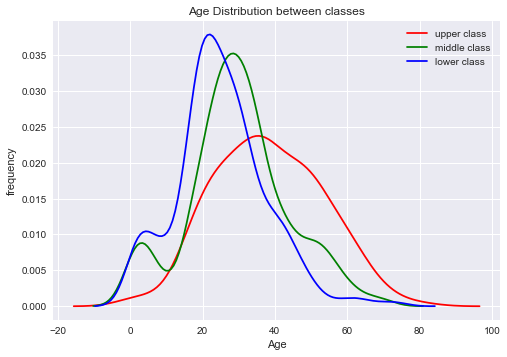

In [56]:
upper_class_age = passengers_df.loc[((passengers_df['Pclass'] == 1) & (~passengers_df['Age'].isnull())), 'Age'] 
middle_class_age = passengers_df.loc[((passengers_df['Pclass'] == 2) & (~passengers_df['Age'].isnull())), 'Age'] 
lower_class_age = passengers_df.loc[((passengers_df['Pclass'] == 3) & (~passengers_df['Age'].isnull())), 'Age'] 
ax = sns.distplot(upper_class_age, age_bins, color='r', hist=False, label="upper class")
ax = sns.distplot(middle_class_age, age_bins, color='g', hist=False, label="middle class")
ax = sns.distplot(lower_class_age, age_bins, color='b', hist=False, label="lower class")
plot.title("Age Distribution between classes")
plot.ylabel("frequency")
plot.show()

####From the above chart, we can get the age distribution about three classes. Upper class have more passengers over 40 years old, middle and lower classes have most passengers around 30 years old. And lower class have more passengers younger than 30 years old compared to other two classes.

###What is the age distribution among survivors?

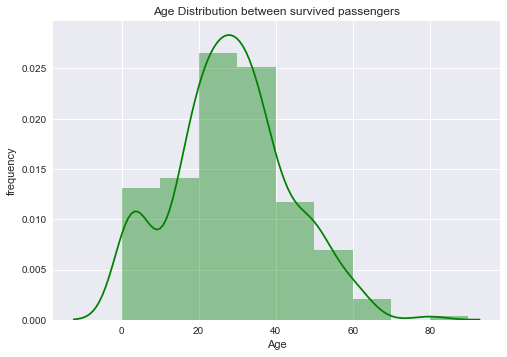

In [77]:
bin_width = 10
survival_ages = passengers_df.loc[((passengers_df['Survived'] == 1) & (~passengers_df['Age'].isnull())), 'Age'] 
ax = sns.distplot(survival_ages, age_bins, color='g', hist=True)
plot.title("Age Distribution between survived passengers")
plot.ylabel("frequency")
plot.show()

####From the above char we can see that 20~25 years old passengers are the most survived.

###What is the survival rate among each age range?

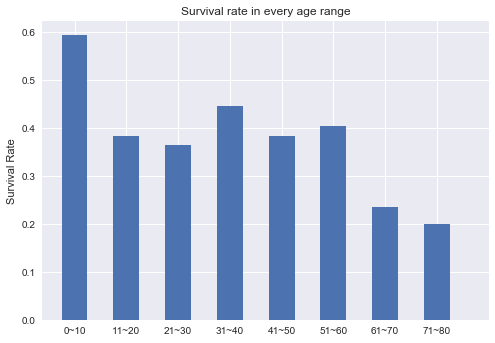

In [101]:
rates = survival_ages.groupby(pd.cut(survival_ages, age_bins)).count() / ages.groupby(pd.cut(ages, age_bins)).count()
x = np.arange(0, 9)
fig, ax = plot.subplots()
ax.bar(x, rates, 0.5)
ax.set_ylabel("Survival Rate")
ax.set_title("Survival rate in every age range")
ax.set_xticks(x)
ax.set_xticklabels(["0~10", "11~20", "21~30", "31~40", "41~50", "51~60", "61~70", "71~80"])
plot.show()

####From the above figure and survival rates, we know that the highest survival rate is between age 0~10 and the lowest survival rate is bewtween age 71~80. 

##Question5: Does the number of relatives on the boat have a effect on the survival rate? Relatives include siblings and parents.

###What is the overall relative number distribution?
###What is the survival rate among every number of relatives?

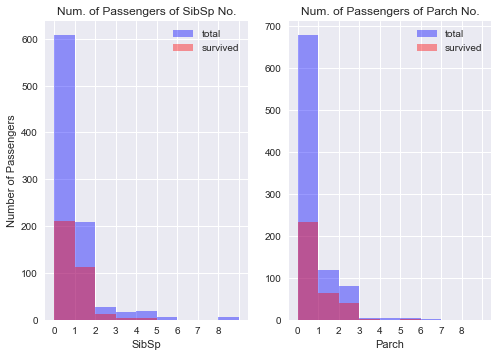

In [203]:
sibsp = passengers_df['SibSp'] 
parch = passengers_df['Parch']
num_range = np.arange(10)
fig, ax = plot.subplots(1,2)
sns.distplot(sibsp, num_range, color='b', hist=True, kde=False, ax=ax[0])
sns.distplot(survival_sibsp, num_range, color='r', hist=True, kde=False, ax=ax[0])
sns.distplot(parch, num_range, color='b', hist=True, kde=False, ax=ax[1])
sns.distplot(survival_parch, num_range, color='r', hist=True, kde=False, ax=ax[1])
setChartHead(ax[0], "Num. of Passengers of SibSp No.", [0,1,2,3,4,5,6,7,8], "Number of Passengers", num_range, ['total','survived'])
setChartHead(ax[1], "Num. of Passengers of Parch No.", [0,1,2,3,4,5,6,7,8], "", num_range, ['total','survived'])
plot.show()

####From the above charts, we get that passengers that have 1~3 family members have a higer survival rate compared to those have 0 family member.

#Part4 Conclusion

####Through the above basic analysis of the Titanic dataset. There are several clear facts we can get. First, women have a higher survival rate than men when they are in the same class. Passengers in upper class have a higher survival rate that passengers in middle class and lower class. And middle class passengers also have a higher survival rate than lower class passengers. From the age distribution of three classes, middle class and lower class have more young passengers than upper class. Children between 0~10 years old have a higher survival rate than any age range. Senior passegers between 70~80 years old have the lowest survival rate. passengers who have relatives on boat have a higher survival rate than those don't have any relatatives.
####There are some limitions on this analysis. Some data are missing, for example not every passenger has a valid age recorded. The age analysis are only based on the existed data we have. What's more, the cabin valid information are too less to do analysis. Although the cabin position of each passenger may be a very important reason to survive during the disaster. The above facts we get only rely on the data we have and the facts can not be a prediction or a general rule to be always true.